# Visualizing the solution of the pouring problem

The purpose of this notebook is to build a visualization of the paths explored by the `pour_problem()` function introduced in lesson 4. For this purpose, we copy the `successors()` function from that notebook and we modify the `pour_problem()` so that it adds *all* explored paths to the edge set of the `dot` object.

In [8]:
from collections import deque
import graphviz

Fail = []

def pour_problem(X, Y, goal, start=(0, 0)):
    if goal in start:
        return [start]
    explored = set()
    dot = graphviz.Digraph("Explored Paths")
    frontier = deque([[start]])
    while frontier:
        path = frontier.popleft()
        (x, y) = path[-1]
        for state, action in successors(x, y, X, Y).items():
            dot.edge(str((x, y)), str(state), label=action)
            if state not in explored:
                explored.add(state)
                path2 = path + [action, state]
                if goal in state:
                    return dot
                else:
                    frontier.append(path2)
    return Fail


def successors(x, y, X, Y):
    assert x <= X and y <= Y
    return {
        ((0, y + x) if y + x <= Y else (x - (Y - y), y + (Y - y))): "X -> Y",
        ((x + y, 0) if x + y <= X else (x + (X - x), y - (X - x))): "X <- Y",
        (X, y): "fill X",
        (x, Y): "fill Y",
        (0, y): "empty X",
        (x, 0): "empty Y",
    }

As we can see from the graph below, the method explores multiple paths. In the top node `fill Y` seems to appear twice. **TODO** check that this is not a bug.

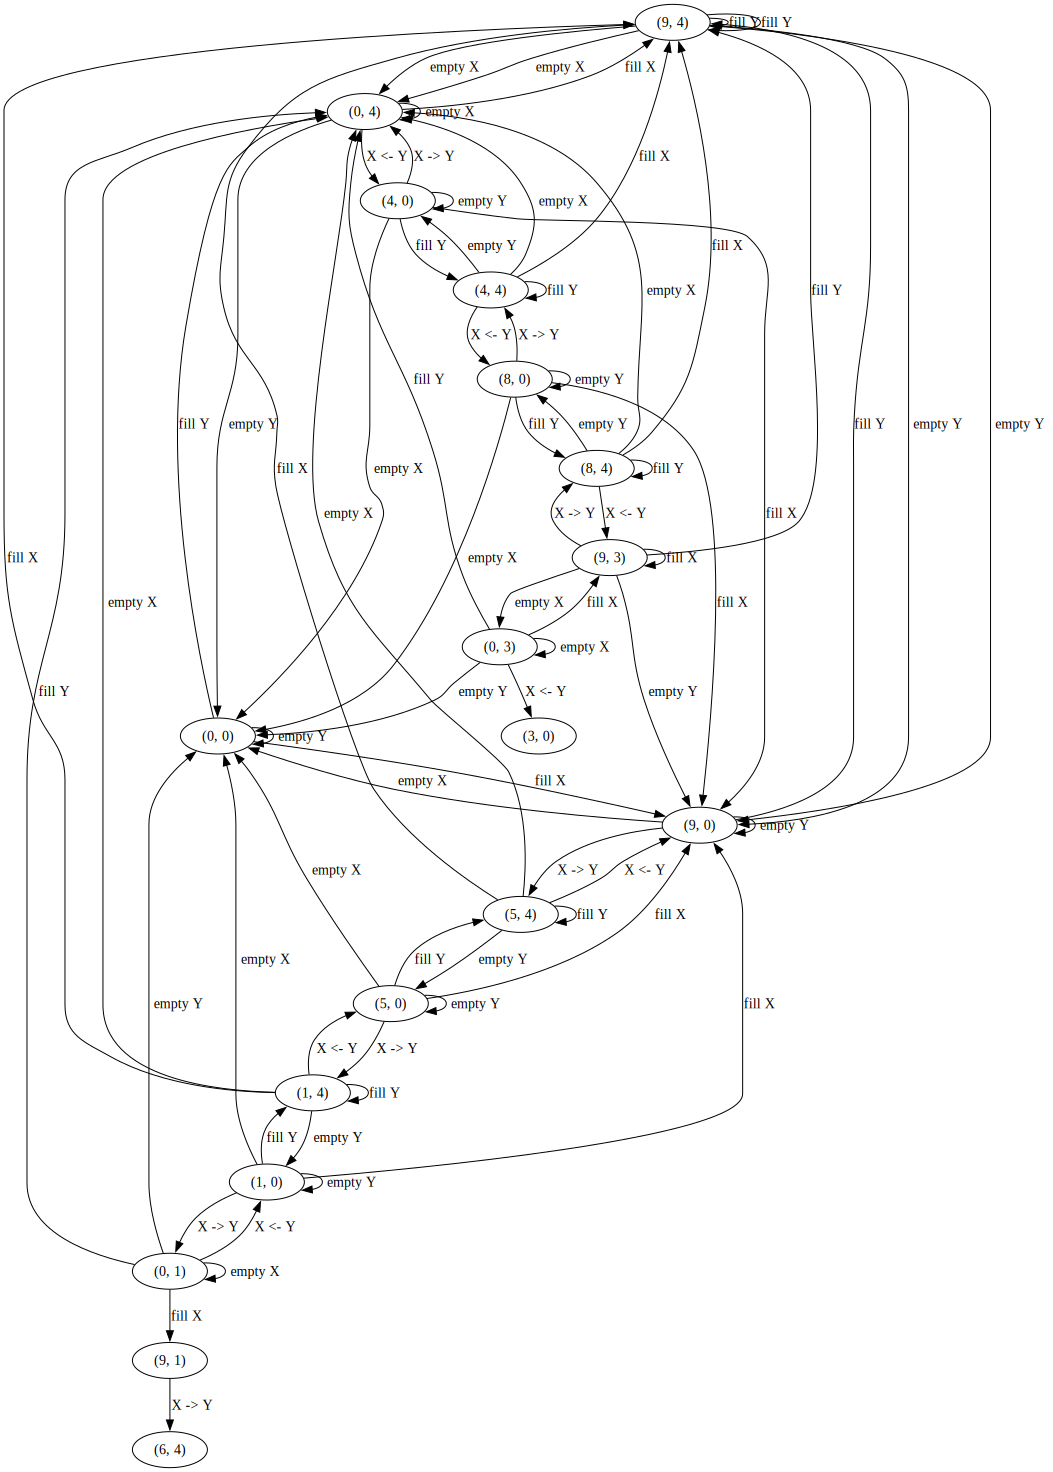

In [9]:
dot = pour_problem(9, 4, 6, start=(9, 4))
dot